In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
import pandas as pd
balraj98_massachusetts_roads_dataset_path = kagglehub.dataset_download('balraj98/massachusetts-roads-dataset')

print('Data source import complete.')


In [2]:
! mv {balraj98_massachusetts_roads_dataset_path} .

Let's inspect a few images from the dataset.

In [6]:
import pandas as pd
IMG_ROOT = 'roads-dataset'
df = pd.read_csv('roads-dataset/metadata.csv')

train_df = df.loc[df['split'] == 'train']
tst_df = df.loc[df['split'] == 'test']
print("Training dataset size:", len(train_df))
print("Test dataset size:", len(tst_df))

Training dataset size: 1108
Test dataset size: 49


In [7]:
train_df.head()

image_id  split                                    image_souce_url  \
0  10078660_15  train  http://www.cs.toronto.edu/~vmnih/data/mass_roa...   
1  10078675_15  train  http://www.cs.toronto.edu/~vmnih/data/mass_roa...   
2  10078690_15  train  http://www.cs.toronto.edu/~vmnih/data/mass_roa...   
3  10078705_15  train  http://www.cs.toronto.edu/~vmnih/data/mass_roa...   
4  10078720_15  train  http://www.cs.toronto.edu/~vmnih/data/mass_roa...   

                                    label_source_url  \
0  http://www.cs.toronto.edu/~vmnih/data/mass_roa...   
1  http://www.cs.toronto.edu/~vmnih/data/mass_roa...   
2  http://www.cs.toronto.edu/~vmnih/data/mass_roa...   
3  http://www.cs.toronto.edu/~vmnih/data/mass_roa...   
4  http://www.cs.toronto.edu/~vmnih/data/mass_roa...   

               tiff_image_path                     tif_label_path  \
0  tiff/train/10078660_15.tiff  tiff/train_labels/10078660_15.tif   
1  tiff/train/10078675_15.tiff  tiff/train_labels/10078675_15.tif   
2  tiff/train/10078690_15.tiff  tiff/train_labels/10078690_15.tif   
3  tiff/train/10078705_15.tiff  tiff/train_labels/10078705_15.tif   
4  tiff/train/10078720_15.tiff  tiff/train_labels/10078720_15.tif   

              png_image_path                    png_label_path  
0  png/train/10078660_15.png  png/train_labels/10078660_15.png  
1  png/train/10078675_15.png  png/train_labels/10078675_15.png  
2  png/train/10078690_15.png  png/train_labels/10078690_15.png  
3  png/train/10078705_15.png  png/train_labels/10078705_15.png  
4  png/train/10078720_15.png  png/train_labels/10078720_15.png

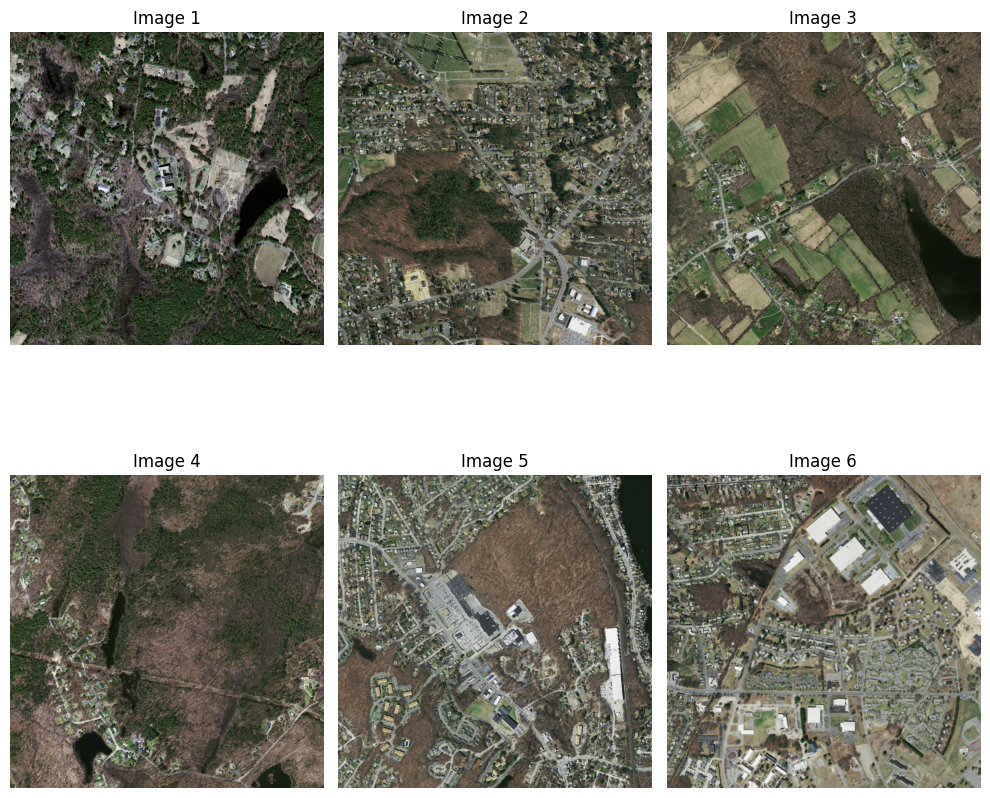

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import tifffile as tiff  # or use PIL.Image if preferred

# Sample 6 random image paths
sample_paths = tst_df['tiff_image_path'].sample(6).tolist()

# Load images
images = [tiff.imread(os.path.join("roads-dataset", path)) for path in sample_paths]

# Plot
fig, axes = plt.subplots(2, 3, figsize=(10, 10))
axes = axes.flatten()

for i, (img, ax) in enumerate(zip(images, axes)):
    ax.imshow(img, cmap='gray' if img.ndim == 2 else None)
    ax.set_title(f"Image {i+1}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
device = 'cuda' if torch.cuda.is_available() else 'cpu'

The dataset consists of $151$ aerial images of the Boston area. It covers mostly urban and suburban areas and buildings of all sizes. Each of the images has $1500 \times 1500$ pixels for an area of $2.25$ square kilometers. In total the dataset covers $340$ square kilometers area.

An accompanying **metadata.csv** is provided with each image ID, the split it belongs to, image urls and path to it.

In [22]:
IMG_ROOT = 'roads-dataset/'
df = pd.read_csv('roads-dataset/metadata.csv')

train_df = df.loc[df['split'] == 'train']
tst_df = df.loc[df['split'] == 'test']

Here is the code to pick random crop from middle.

In [28]:
pd.read_csv('roads-dataset/metadata.csv').head()

image_id  split                                    image_souce_url  \
0  10078660_15  train  http://www.cs.toronto.edu/~vmnih/data/mass_roa...   
1  10078675_15  train  http://www.cs.toronto.edu/~vmnih/data/mass_roa...   
2  10078690_15  train  http://www.cs.toronto.edu/~vmnih/data/mass_roa...   
3  10078705_15  train  http://www.cs.toronto.edu/~vmnih/data/mass_roa...   
4  10078720_15  train  http://www.cs.toronto.edu/~vmnih/data/mass_roa...   

                                    label_source_url  \
0  http://www.cs.toronto.edu/~vmnih/data/mass_roa...   
1  http://www.cs.toronto.edu/~vmnih/data/mass_roa...   
2  http://www.cs.toronto.edu/~vmnih/data/mass_roa...   
3  http://www.cs.toronto.edu/~vmnih/data/mass_roa...   
4  http://www.cs.toronto.edu/~vmnih/data/mass_roa...   

               tiff_image_path                     tif_label_path  \
0  tiff/train/10078660_15.tiff  tiff/train_labels/10078660_15.tif   
1  tiff/train/10078675_15.tiff  tiff/train_labels/10078675_15.tif   
2  tiff/train/10078690_15.tiff  tiff/train_labels/10078690_15.tif   
3  tiff/train/10078705_15.tiff  tiff/train_labels/10078705_15.tif   
4  tiff/train/10078720_15.tiff  tiff/train_labels/10078720_15.tif   

              png_image_path                    png_label_path  
0  png/train/10078660_15.png  png/train_labels/10078660_15.png  
1  png/train/10078675_15.png  png/train_labels/10078675_15.png  
2  png/train/10078690_15.png  png/train_labels/10078690_15.png  
3  png/train/10078705_15.png  png/train_labels/10078705_15.png  
4  png/train/10078720_15.png  png/train_labels/10078720_15.png

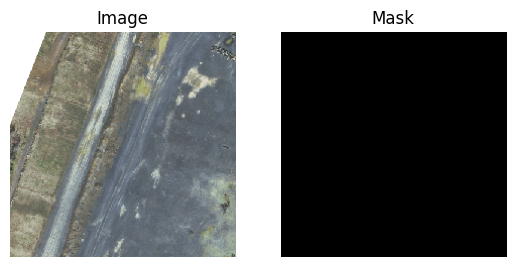

In [ ]:
import random
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import cv2


class BuildingDataset(Dataset):
    def __init__(self, df, root=IMG_ROOT):
        self.df = df
        self.root = root

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        crop_size = 224
        img_path = self.root + self.df.iloc[idx]['tiff_image_path']
        mask_path = self.root + self.df.iloc[idx]['tif_label_path']
        # img_path = img_path.replace("png", "tiff")

        # print(img_path)
        img = cv2.imread(img_path)
        mask = cv2.imread(mask_path)

        # Convert mask to grayscale
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

        # Get original image dimensions
        H, W, _ = img.shape

        # Ensure crop size fits
        if H < crop_size or W < crop_size:
            raise ValueError(f"Image too small for 224x224 crop: {H}x{W}")

        # Pick random crop coordinates near the center
        center_x, center_y = W // 2, H // 2
        max_offset_x = (W - crop_size) // 2
        max_offset_y = (H - crop_size) // 2

        rand_offset_x = random.randint(max(0, center_x - max_offset_x), min(W - crop_size, center_x + max_offset_x))
        rand_offset_y = random.randint(max(0, center_y - max_offset_y), min(H - crop_size, center_y + max_offset_y))

        img_cropped = img[rand_offset_y:rand_offset_y+crop_size, rand_offset_x:rand_offset_x+crop_size]
        mask_cropped = mask[rand_offset_y:rand_offset_y+crop_size, rand_offset_x:rand_offset_x+crop_size]

        return img_cropped, mask_cropped

    def collate_fn(self, batch):
        images, masks = list(zip(*batch))
        images = torch.cat([tfms(img.copy() / 255.0)[None] for img in images]).float().to(device)
        masks = torch.cat([torch.Tensor(mask[None]) for mask in masks]).long().to(device)
        return images, masks


tr_ds = BuildingDataset(train_df)
tst_ds = BuildingDataset(tst_df)

tr_dl = DataLoader(tr_ds, batch_size=4, drop_last=True, shuffle=True,
                  collate_fn=tr_ds.collate_fn)
tst_dl = DataLoader(tst_ds, batch_size=1, drop_last=True, shuffle=True,
                  collate_fn=tst_ds.collate_fn)

img, mask = tr_ds[13]
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img[:, :, :], cmap = "gray")
ax[0].set_title("Image")
ax[0].axis('off')

ax[1].imshow(mask, cmap='gray')  # show mask in grayscale
ax[1].set_title("Mask")
ax[1].axis('off')

plt.show()


With the same reasoning that we provided for training building segmentation maps, we would be using (224 x 244) crops. However when we tried the center crop like the building dataset most datapoints gave empty masks, as roads are much more sparer. So we came up with a logic to find out the crops with roads in them. 

In [30]:
import random
import cv2
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import numpy as np

tfms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], # imagenet
                         [0.229, 0.224, 0.225])
])


class RoadDataset(Dataset):
    def __init__(self, df, root=IMG_ROOT, crop_size=224, max_tries=10):
        self.df = df
        self.root = root
        self.crop_size = crop_size
        self.max_tries = max_tries

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        crop_size = self.crop_size
        img_path = self.root + self.df.iloc[idx]['tiff_image_path']
        mask_path = self.root + self.df.iloc[idx]['tif_label_path']

        img = cv2.imread(img_path)
        if img is None:
            raise ValueError(f"Image not found at {img_path}")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        if mask is None:
            raise ValueError(f"Mask not found at {mask_path}")

        H, W = mask.shape

        # Ensure crop size fits
        if H < crop_size or W < crop_size:
            raise ValueError(f"Image too small for crop: {H}x{W}")

        # Try multiple times to find a crop with road pixels and not mostly white
        for _ in range(self.max_tries):
            rand_x = random.randint(0, W - crop_size)
            rand_y = random.randint(0, H - crop_size)

            img_crop = img[rand_y:rand_y+crop_size, rand_x:rand_x+crop_size]
            mask_crop = mask[rand_y:rand_y+crop_size, rand_x:rand_x+crop_size]

            # Check if mask has road pixels
            has_road = mask_crop.sum() > 0

            # Check if image is more than 90% white
            white_pixel_ratio = np.mean(np.all(img_crop >= 250, axis=-1))  # True if R,G,B >= 250
            is_mostly_white = white_pixel_ratio > 0.9

            if has_road and not is_mostly_white:
                return img_crop, mask_crop

        # Fallback: random crop without road/white check
        rand_x = random.randint(0, W - crop_size)
        rand_y = random.randint(0, H - crop_size)
        img_crop = img[rand_y:rand_y+crop_size, rand_x:rand_x+crop_size]
        mask_crop = mask[rand_y:rand_y+crop_size, rand_x:rand_x+crop_size]
        return img_crop, mask_crop

    def collate_fn(self, batch):
        images, masks = list(zip(*batch))
        images = torch.cat([tfms(img.copy() / 255.0)[None] for img in images]).float().to(device)
        masks = torch.cat([torch.Tensor(mask[None]) for mask in masks]).long().to(device)
        return images, masks
    

tr_ds = RoadDataset(train_df)
tst_ds = RoadDataset(tst_df)

tr_dl = DataLoader(tr_ds, batch_size=4, drop_last=True, shuffle=True,
                  collate_fn=tr_ds.collate_fn)
tst_dl = DataLoader(tst_ds, batch_size=1, drop_last=True, shuffle=True,
                  collate_fn=tst_ds.collate_fn)


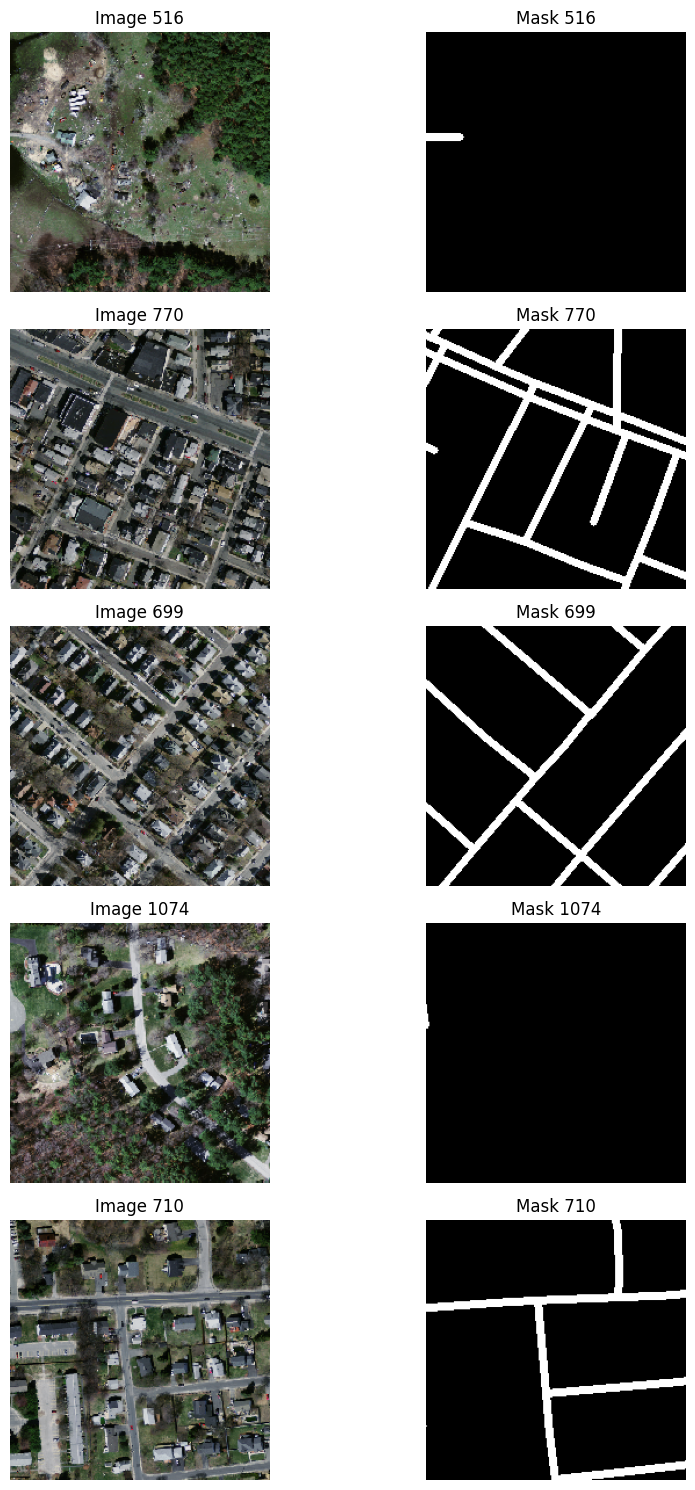

In [29]:
# Sample 5 random indices from training dataset
indices = random.sample(range(len(tr_ds)), 5)

# Create a figure with 5 rows and 2 columns
fig, axes = plt.subplots(5, 2, figsize=(10, 15))

for i, idx in enumerate(indices):
    img, mask = tr_ds[idx]

    # Show image
    axes[i, 0].imshow(img)
    axes[i, 0].set_title(f"Image {idx}")
    axes[i, 0].axis('off')

    # Show corresponding mask
    axes[i, 1].imshow(mask, cmap='gray')
    axes[i, 1].set_title(f"Mask {idx}")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

Like the Building segmentation model we define a UNet model with cross entropy loss and train  it on a Adam optimizer for 50 epochs.

In [33]:
import torch.nn as nn
from torchvision.models import vgg16_bn
device = "cuda"

def conv(in_channels, out_channels):
    return nn.Sequential(
      nn.Conv2d(in_channels, out_channels, kernel_size=3,
                stride=1, padding=1),
      nn.BatchNorm2d(out_channels),
      nn.ReLU(inplace=True)
  )

def up_conv(in_channels, out_channels):
    return nn.Sequential(
     nn.ConvTranspose2d(in_channels, out_channels,
                         kernel_size=2, stride=2),
     nn.ReLU(inplace=True)
  )

class UNet(nn.Module):
    def __init__(self, pretrained=True, out_channels=12):
        super().__init__()
        self.backbone = vgg16_bn(pretrained=True).to(device).features
        self.down1 = nn.Sequential(*self.backbone[:6]) # 64
        self.down2 = nn.Sequential(*self.backbone[6:13]) # 128
        self.down3 = nn.Sequential(*self.backbone[13:20]) # 256
        self.down4 = nn.Sequential(*self.backbone[20:27]) # 512
        self.down5 = nn.Sequential(*self.backbone[27:34]) # 512

        self.bottleneck = nn.Sequential(*self.backbone[34:]) # 512
        self.conv_bottleneck = conv(512, 1024)

        self.up_conv5 = up_conv(1024, 512)
        self.merge_conv5 = conv(512+512, 512)
        self.up_conv4 = up_conv(512, 256)
        self.merge_conv4 = conv(512 + 256, 256)
        self.up_conv3 = up_conv(256, 128)
        self.merge_conv3 = conv(256+128, 128)
        self.up_conv2 = up_conv(128, 64)
        self.merge_conv2 = conv(128+64, 64)
        self.up_conv1 = up_conv(64, 32)
        self.merge_conv1 = conv(32+64, 32)

        self.final_conv = nn.Conv2d(32, out_channels, kernel_size=1)

    def forward(self, x):
        # encoder
        x_1 = self.down1(x)
        x_2 = self.down2(x_1)
        x_3 = self.down3(x_2)
        x_4 = self.down4(x_3)
        x_5 = self.down5(x_4)
        # bottleneck
        x = self.bottleneck(x_5)
        x = self.conv_bottleneck(x)
        # decoder
        x = self.up_conv5(x)
        x = self.merge_conv5(torch.cat([x, x_5], dim=1))
        x = self.up_conv4(x)
        x = self.merge_conv4(torch.cat([x, x_4], dim=1))
        x = self.up_conv3(x)
        x = self.merge_conv3(torch.cat([x, x_3], dim=1))
        x = self.up_conv2(x)
        x = self.merge_conv2(torch.cat([x, x_2], dim=1))
        x = self.up_conv1(x)
        x = self.merge_conv1(torch.cat([x, x_1], dim=1))

        x = self.final_conv(x)
        return x

model = UNet().to(device)
model(torch.zeros((1, 3, 224, 224)).to(device))

/home/inicai/Desktop/map-segmentation/env/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/inicai/Desktop/map-segmentation/env/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


tensor([[[[ 2.5094,  4.1300,  2.1731,  ...,  3.4312,  2.8447,  1.7201],
          [ 1.8814,  1.6024, -0.6629,  ...,  0.5316,  0.8843,  0.7700],
          [ 1.4965,  2.9546, -1.0448,  ...,  0.0191,  1.1177,  0.3784],
          ...,
          [ 1.7278,  2.5838,  0.3672,  ..., -0.1365,  1.6900, -0.6935],
          [-0.0231,  3.1876, -0.0315,  ...,  1.0069,  1.2381,  0.7211],
          [ 3.9369,  3.0976,  3.0573,  ...,  3.0791,  4.6050,  1.9303]],

         [[-1.6919, -3.8833, -1.6329,  ..., -3.1551, -1.0025, -1.4037],
          [-1.2485, -2.2185, -2.1066,  ..., -2.1682, -2.5042, -3.7772],
          [-2.2552, -0.9162, -0.8880,  ..., -1.7810, -1.0184, -1.4237],
          ...,
          [-2.3007, -0.0075, -0.2910,  ..., -0.6613, -0.8662, -1.5207],
          [-4.1299, -2.0657, -3.6592,  ..., -3.9706, -1.7270, -3.4033],
          [-4.0772, -1.2119, -2.0834,  ..., -3.1641, -1.9044, -1.5768]],

         [[ 1.0649,  1.8926,  2.6536,  ...,  1.4412,  2.1498, -0.3226],
          [-2.1797, -0.1906, -

In [36]:
from tqdm import tqdm  # for progress bars

def loss_fn(preds, targets):
    loss_fn = nn.CrossEntropyLoss()
    loss = loss_fn(preds, targets)
    acc = (torch.max(preds, 1)[1] == targets).float().mean()
    return loss, acc

def train_batch(model, batch, optim, loss_fn):
    model.train()
    imgs, masks = batch
    pred_masks = model(imgs)
    optim.zero_grad()
    loss, acc = loss_fn(pred_masks, masks)
    loss.backward()
    optim.step()
    return loss.item(), acc.item()

@torch.no_grad()
def validate_batch(model, batch, loss_fn):
    model.eval()
    imgs, masks = batch
    pred_masks = model(imgs)
    loss, acc = loss_fn(pred_masks, masks)
    return loss.item(), acc.item()

model = UNet(out_channels=300).to(device)
optim = torch.optim.Adam(model.parameters(), lr=1e-3)
n_epochs = 50

for epoch in range(n_epochs):
    train_losses, train_accs = [], []
    val_losses, val_accs = [], []

    # Training loop
    pbar = tqdm(tr_dl, desc=f"Epoch {epoch+1}/{n_epochs} [Training]")
    for batch in pbar:
        loss, acc = train_batch(model, batch, optim, loss_fn)
        train_losses.append(loss)
        train_accs.append(acc)
        pbar.set_postfix({"Loss": f"{loss:.4f}", "Acc": f"{acc:.4f}"})

    # Validation loop
    pbar = tqdm(tst_dl, desc=f"Epoch {epoch+1}/{n_epochs} [Validation]")
    for batch in pbar:
        loss, acc = validate_batch(model, batch, loss_fn)
        val_losses.append(loss)
        val_accs.append(acc)
        pbar.set_postfix({"Loss": f"{loss:.4f}", "Acc": f"{acc:.4f}"})

    # Epoch summary
    print(
        f"Epoch {epoch+1}/{n_epochs}: "
        f"Train Loss={sum(train_losses)/len(train_losses):.4f}, "
        f"Train Acc={sum(train_accs)/len(train_accs):.4f}, "
        f"Val Loss={sum(val_losses)/len(val_losses):.4f}, "
        f"Val Acc={sum(val_accs)/len(val_accs):.4f}"
    )


Epoch 1/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 50.65it/s, Loss=0.2702, Acc=0.9361]


Epoch 1/50: Train Loss=1.7350, Train Acc=0.8132, Val Loss=0.2230, Val Acc=0.9341


Epoch 2/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 53.48it/s, Loss=0.0632, Acc=0.9829]


Epoch 2/50: Train Loss=0.1719, Train Acc=0.9528, Val Loss=0.1155, Val Acc=0.9610


Epoch 3/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 53.58it/s, Loss=0.1391, Acc=0.9671]


Epoch 3/50: Train Loss=0.1270, Train Acc=0.9597, Val Loss=0.1014, Val Acc=0.9668


Epoch 4/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 53.12it/s, Loss=0.1263, Acc=0.9454]


Epoch 4/50: Train Loss=0.1165, Train Acc=0.9622, Val Loss=0.0960, Val Acc=0.9655


Epoch 5/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 51.88it/s, Loss=0.2761, Acc=0.8997]


Epoch 5/50: Train Loss=0.1083, Train Acc=0.9645, Val Loss=0.0883, Val Acc=0.9702


Epoch 6/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 53.10it/s, Loss=0.0744, Acc=0.9794]


Epoch 6/50: Train Loss=0.1137, Train Acc=0.9624, Val Loss=0.0953, Val Acc=0.9671


Epoch 7/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 52.08it/s, Loss=0.0072, Acc=0.9998]


Epoch 7/50: Train Loss=0.1086, Train Acc=0.9642, Val Loss=0.0743, Val Acc=0.9734


Epoch 8/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 49.52it/s, Loss=0.0146, Acc=0.9962]


Epoch 8/50: Train Loss=0.1014, Train Acc=0.9665, Val Loss=0.0890, Val Acc=0.9669


Epoch 9/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 50.85it/s, Loss=0.0337, Acc=0.9865]


Epoch 9/50: Train Loss=0.1051, Train Acc=0.9654, Val Loss=0.0905, Val Acc=0.9672


Epoch 10/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 49.76it/s, Loss=0.0511, Acc=0.9799]


Epoch 10/50: Train Loss=0.1003, Train Acc=0.9664, Val Loss=0.0766, Val Acc=0.9711


Epoch 11/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 50.78it/s, Loss=0.0888, Acc=0.9638]


Epoch 11/50: Train Loss=0.0948, Train Acc=0.9683, Val Loss=0.0715, Val Acc=0.9738


Epoch 12/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 49.33it/s, Loss=0.0330, Acc=0.9881]


Epoch 12/50: Train Loss=0.0986, Train Acc=0.9676, Val Loss=0.0608, Val Acc=0.9786


Epoch 13/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 50.67it/s, Loss=0.0580, Acc=0.9895]


Epoch 13/50: Train Loss=0.0957, Train Acc=0.9682, Val Loss=0.0774, Val Acc=0.9720


Epoch 14/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 51.03it/s, Loss=0.1240, Acc=0.9610]


Epoch 14/50: Train Loss=0.0979, Train Acc=0.9675, Val Loss=0.0737, Val Acc=0.9718


Epoch 15/50 [Validation]: 100%|██████████| 49/49 [00:01<00:00, 46.97it/s, Loss=0.2928, Acc=0.8925]


Epoch 15/50: Train Loss=0.0954, Train Acc=0.9680, Val Loss=0.0857, Val Acc=0.9677


Epoch 16/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 50.73it/s, Loss=0.0478, Acc=0.9808]


Epoch 16/50: Train Loss=0.0932, Train Acc=0.9685, Val Loss=0.0888, Val Acc=0.9693


Epoch 17/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 51.59it/s, Loss=0.0334, Acc=0.9906]


Epoch 17/50: Train Loss=0.0952, Train Acc=0.9682, Val Loss=0.0771, Val Acc=0.9711


Epoch 18/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 53.01it/s, Loss=0.0182, Acc=0.9936]


Epoch 18/50: Train Loss=0.0949, Train Acc=0.9682, Val Loss=0.0706, Val Acc=0.9737


Epoch 19/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 51.78it/s, Loss=0.0074, Acc=0.9998]


Epoch 19/50: Train Loss=0.0905, Train Acc=0.9698, Val Loss=0.0720, Val Acc=0.9736


Epoch 20/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 51.19it/s, Loss=0.0969, Acc=0.9558]


Epoch 20/50: Train Loss=0.0945, Train Acc=0.9686, Val Loss=0.0794, Val Acc=0.9721


Epoch 21/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 51.24it/s, Loss=0.0179, Acc=0.9947]


Epoch 21/50: Train Loss=0.0932, Train Acc=0.9690, Val Loss=0.0700, Val Acc=0.9738


Epoch 22/50 [Validation]: 100%|██████████| 49/49 [00:01<00:00, 45.54it/s, Loss=0.0204, Acc=0.9922]


Epoch 22/50: Train Loss=0.0902, Train Acc=0.9698, Val Loss=0.0693, Val Acc=0.9722


Epoch 23/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 51.75it/s, Loss=0.0367, Acc=0.9864]


Epoch 23/50: Train Loss=0.0919, Train Acc=0.9694, Val Loss=0.0691, Val Acc=0.9743


Epoch 24/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 50.84it/s, Loss=0.0833, Acc=0.9642]


Epoch 24/50: Train Loss=0.0925, Train Acc=0.9689, Val Loss=0.0827, Val Acc=0.9693


Epoch 25/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 52.40it/s, Loss=0.0206, Acc=0.9923]


Epoch 25/50: Train Loss=0.0855, Train Acc=0.9714, Val Loss=0.0737, Val Acc=0.9737


Epoch 26/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 52.29it/s, Loss=0.1055, Acc=0.9581]


Epoch 26/50: Train Loss=0.0889, Train Acc=0.9702, Val Loss=0.0727, Val Acc=0.9736


Epoch 27/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 51.80it/s, Loss=0.1040, Acc=0.9551]


Epoch 27/50: Train Loss=0.0882, Train Acc=0.9703, Val Loss=0.0739, Val Acc=0.9714


Epoch 28/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 51.54it/s, Loss=0.1056, Acc=0.9571]


Epoch 28/50: Train Loss=0.0884, Train Acc=0.9705, Val Loss=0.0711, Val Acc=0.9731


Epoch 29/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 53.15it/s, Loss=0.0217, Acc=0.9912]


Epoch 29/50: Train Loss=0.0876, Train Acc=0.9707, Val Loss=0.0663, Val Acc=0.9744


Epoch 30/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 52.38it/s, Loss=0.0233, Acc=0.9911]


Epoch 30/50: Train Loss=0.0893, Train Acc=0.9702, Val Loss=0.0644, Val Acc=0.9752


Epoch 31/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 52.42it/s, Loss=0.0236, Acc=0.9915]


Epoch 31/50: Train Loss=0.0888, Train Acc=0.9706, Val Loss=0.0587, Val Acc=0.9781


Epoch 32/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 52.10it/s, Loss=0.0167, Acc=0.9950]


Epoch 32/50: Train Loss=0.0825, Train Acc=0.9721, Val Loss=0.0684, Val Acc=0.9745


Epoch 33/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 51.97it/s, Loss=0.0591, Acc=0.9806]


Epoch 33/50: Train Loss=0.0894, Train Acc=0.9704, Val Loss=0.0601, Val Acc=0.9779


Epoch 34/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 51.28it/s, Loss=0.1441, Acc=0.9330]


Epoch 34/50: Train Loss=0.0870, Train Acc=0.9710, Val Loss=0.0620, Val Acc=0.9777


Epoch 35/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 52.17it/s, Loss=0.0121, Acc=0.9976]


Epoch 35/50: Train Loss=0.0864, Train Acc=0.9710, Val Loss=0.0696, Val Acc=0.9744


Epoch 36/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 51.71it/s, Loss=0.0355, Acc=0.9902]


Epoch 36/50: Train Loss=0.0892, Train Acc=0.9705, Val Loss=0.0724, Val Acc=0.9745


Epoch 37/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 53.31it/s, Loss=0.6933, Acc=0.7580]


Epoch 37/50: Train Loss=0.0885, Train Acc=0.9706, Val Loss=0.0790, Val Acc=0.9692


Epoch 38/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 52.12it/s, Loss=0.0680, Acc=0.9789]


Epoch 38/50: Train Loss=0.0906, Train Acc=0.9696, Val Loss=0.0629, Val Acc=0.9782


Epoch 39/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 52.59it/s, Loss=0.0151, Acc=0.9962]


Epoch 39/50: Train Loss=0.0848, Train Acc=0.9715, Val Loss=0.0737, Val Acc=0.9735


Epoch 40/50 [Validation]: 100%|██████████| 49/49 [00:01<00:00, 44.33it/s, Loss=0.1534, Acc=0.9547]


Epoch 40/50: Train Loss=0.0853, Train Acc=0.9712, Val Loss=0.0673, Val Acc=0.9742


Epoch 41/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 51.59it/s, Loss=0.0207, Acc=0.9956]


Epoch 41/50: Train Loss=0.0886, Train Acc=0.9703, Val Loss=0.0674, Val Acc=0.9745


Epoch 42/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 51.36it/s, Loss=0.0329, Acc=0.9862]


Epoch 42/50: Train Loss=0.0854, Train Acc=0.9716, Val Loss=0.0823, Val Acc=0.9678


Epoch 43/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 53.37it/s, Loss=0.0594, Acc=0.9779]


Epoch 43/50: Train Loss=0.0885, Train Acc=0.9702, Val Loss=0.0572, Val Acc=0.9794


Epoch 44/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 52.57it/s, Loss=0.0623, Acc=0.9746]


Epoch 44/50: Train Loss=0.0841, Train Acc=0.9718, Val Loss=0.0640, Val Acc=0.9766


Epoch 45/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 51.11it/s, Loss=0.0427, Acc=0.9835]


Epoch 45/50: Train Loss=0.0823, Train Acc=0.9725, Val Loss=0.0650, Val Acc=0.9751


Epoch 46/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 52.65it/s, Loss=0.0810, Acc=0.9701]


Epoch 46/50: Train Loss=0.0863, Train Acc=0.9707, Val Loss=0.0731, Val Acc=0.9732


Epoch 47/50 [Validation]: 100%|██████████| 49/49 [00:01<00:00, 48.89it/s, Loss=0.1219, Acc=0.9601]


Epoch 47/50: Train Loss=0.0873, Train Acc=0.9709, Val Loss=0.0718, Val Acc=0.9744


Epoch 48/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 52.84it/s, Loss=0.1058, Acc=0.9564]


Epoch 48/50: Train Loss=0.0874, Train Acc=0.9712, Val Loss=0.0665, Val Acc=0.9760


Epoch 49/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 51.60it/s, Loss=0.0387, Acc=0.9818]


Epoch 49/50: Train Loss=0.0831, Train Acc=0.9721, Val Loss=0.0699, Val Acc=0.9729


Epoch 50/50 [Validation]: 100%|██████████| 49/49 [00:00<00:00, 52.15it/s, Loss=0.0126, Acc=0.9984]

Epoch 50/50: Train Loss=0.0844, Train Acc=0.9719, Val Loss=0.0666, Val Acc=0.9765


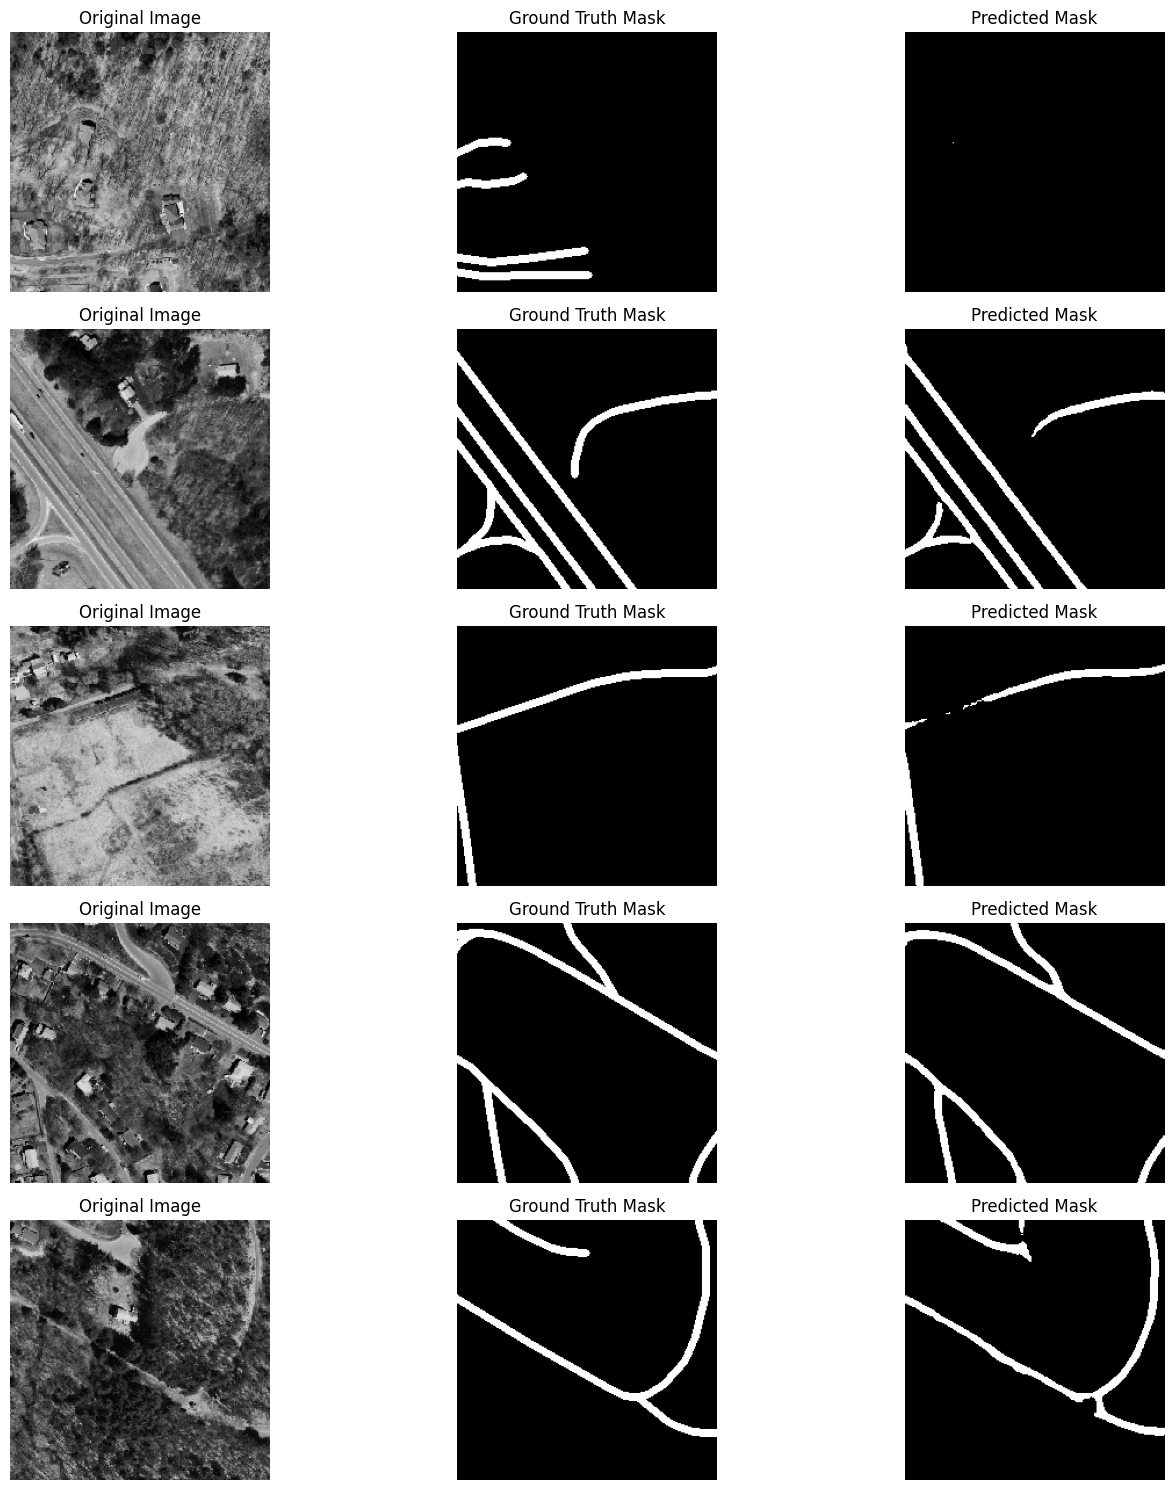

In [37]:
import matplotlib.pyplot as plt
import torch

model.eval()

# Containers for storing the 5 examples
images = []
true_masks = []
pred_masks = []

with torch.no_grad():
    for im_batch, mask_batch in tst_dl:
        im_batch = im_batch.to(device)
        preds = model(im_batch)
        _, pred_mask_batch = torch.max(preds, dim=1)

        for i in range(im_batch.size(0)):
            images.append(im_batch[i].detach().cpu())
            true_masks.append(mask_batch[i].detach().cpu())
            pred_masks.append(pred_mask_batch[i].detach().cpu())

            if len(images) == 5:
                break
        if len(images) == 5:
            break

# Plot the 5 examples
fig, axes = plt.subplots(5, 3, figsize=(15, 15))

for i in range(5):
    img = images[i].permute(1, 2, 0).numpy()
    true_mask = true_masks[i].numpy()
    pred_mask = pred_masks[i].numpy()

    # Original image
    axes[i, 0].imshow(img[:, :, 0], cmap='gray')  # or use full RGB: axes[i, 0].imshow(img)
    axes[i, 0].set_title("Original Image")
    axes[i, 0].axis('off')

    # Ground truth
    axes[i, 1].imshow(true_mask, cmap='gray')
    axes[i, 1].set_title("Ground Truth Mask")
    axes[i, 1].axis('off')

    # Prediction
    axes[i, 2].imshow(pred_mask, cmap='gray')
    axes[i, 2].set_title("Predicted Mask")
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()


In [38]:
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optim.state_dict()
}, "unet_road.pth")


In [ ]:
import torch
import torch.nn as nn
from tqdm import tqdm
import os

# Paths for saving checkpoints
checkpoint_dir = "./checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)

# Loss function
def loss_fn(preds, targets):
    criterion = nn.CrossEntropyLoss()
    loss = criterion(preds, targets)
    acc = (torch.max(preds, 1)[1] == targets).float().mean()
    return loss, acc

# Training step
def train_batch(model, batch, optim, loss_fn):
    model.train()
    imgs, masks = batch
    pred_masks = model(imgs)
    optim.zero_grad()
    loss, acc = loss_fn(pred_masks, masks)
    loss.backward()
    optim.step()
    return loss.item(), acc.item()

# Validation step
@torch.no_grad()
def validate_batch(model, batch, loss_fn):
    model.eval()
    imgs, masks = batch
    pred_masks = model(imgs)
    loss, acc = loss_fn(pred_masks, masks)
    return loss.item(), acc.item()

# Initialize model and optimizer
model = UNet(out_channels=300).to(device)
optim = torch.optim.Adam(model.parameters(), lr=1e-3)
n_epochs = 50

# Track best validation metrics
best_val_loss = float('inf')
best_val_acc = 0.0

for epoch in range(n_epochs):
    train_losses, train_accs = [], []
    val_losses, val_accs = [], []

    # Training loop
    pbar = tqdm(tr_dl, desc=f"Epoch {epoch+1}/{n_epochs} [Training]")
    for batch in pbar:
        loss, acc = train_batch(model, batch, optim, loss_fn)
        train_losses.append(loss)
        train_accs.append(acc)
        pbar.set_postfix({"Loss": f"{loss:.4f}", "Acc": f"{acc:.4f}"})

    # Validation loop
    pbar = tqdm(tst_dl, desc=f"Epoch {epoch+1}/{n_epochs} [Validation]")
    for batch in pbar:
        loss, acc = validate_batch(model, batch, loss_fn)
        val_losses.append(loss)
        val_accs.append(acc)
        pbar.set_postfix({"Loss": f"{loss:.4f}", "Acc": f"{acc:.4f}"})

    # Epoch summary
    avg_train_loss = sum(train_losses) / len(train_losses)
    avg_train_acc = sum(train_accs) / len(train_accs)
    avg_val_loss = sum(val_losses) / len(val_losses)
    avg_val_acc = sum(val_accs) / len(val_accs)

    print(
        f"Epoch {epoch+1}/{n_epochs}: "
        f"Train Loss={avg_train_loss:.4f}, "
        f"Train Acc={avg_train_acc:.4f}, "
        f"Val Loss={avg_val_loss:.4f}, "
        f"Val Acc={avg_val_acc:.4f}"
    )

    # Save checkpoint every 10 epochs
    if (epoch + 1) % 10 == 0:
        checkpoint_path = os.path.join(checkpoint_dir, f"model_epoch_{epoch+1}.pt")
        torch.save({
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optim.state_dict(),
            'train_loss': avg_train_loss,
            'val_loss': avg_val_loss,
            'train_acc': avg_train_acc,
            'val_acc': avg_val_acc,
        }, checkpoint_path)
        print(f"✅ Saved checkpoint: {checkpoint_path}")

    # Save best model (based on validation loss)
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_model_path = os.path.join(checkpoint_dir, "best_model.pt")
        torch.save({
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optim.state_dict(),
            'val_loss': best_val_loss,
        }, best_model_path)
        print(f"🌟 Best model updated at epoch {epoch+1} (Val Loss={best_val_loss:.4f})")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 1/50 [Validation]: 100%|██████████| 49/49 [00:03<00:00, 12.62it/s, Loss=0.0803, Acc=0.9889]


Epoch 1/50: Train Loss=1.8927, Train Acc=0.7843, Val Loss=0.1495, Val Acc=0.9638
🌟 Best model updated at epoch 1 (Val Loss=0.1495)


Epoch 2/50 [Validation]: 100%|██████████| 49/49 [00:03<00:00, 12.88it/s, Loss=0.1119, Acc=0.9480]


Epoch 2/50: Train Loss=0.1491, Train Acc=0.9576, Val Loss=0.1179, Val Acc=0.9541
🌟 Best model updated at epoch 2 (Val Loss=0.1179)


Epoch 3/50 [Validation]: 100%|██████████| 49/49 [00:03<00:00, 12.75it/s, Loss=0.0954, Acc=0.9744]


Epoch 3/50: Train Loss=0.1180, Train Acc=0.9621, Val Loss=0.0886, Val Acc=0.9695
🌟 Best model updated at epoch 3 (Val Loss=0.0886)


Epoch 4/50 [Validation]: 100%|██████████| 49/49 [00:03<00:00, 13.33it/s, Loss=0.1635, Acc=0.9556]


Epoch 4/50: Train Loss=0.1160, Train Acc=0.9620, Val Loss=0.0879, Val Acc=0.9698
🌟 Best model updated at epoch 4 (Val Loss=0.0879)


Epoch 5/50 [Validation]: 100%|██████████| 49/49 [00:03<00:00, 12.73it/s, Loss=0.0656, Acc=0.9740]


Epoch 5/50: Train Loss=0.1077, Train Acc=0.9644, Val Loss=0.1007, Val Acc=0.9639


Epoch 6/50 [Validation]: 100%|██████████| 49/49 [00:03<00:00, 13.21it/s, Loss=0.0394, Acc=0.9876]


Epoch 6/50: Train Loss=0.1091, Train Acc=0.9641, Val Loss=0.0844, Val Acc=0.9708
🌟 Best model updated at epoch 6 (Val Loss=0.0844)


Epoch 7/50 [Validation]: 100%|██████████| 49/49 [00:03<00:00, 13.30it/s, Loss=0.0243, Acc=0.9931]


Epoch 7/50: Train Loss=0.1023, Train Acc=0.9660, Val Loss=0.0883, Val Acc=0.9686


Epoch 8/50 [Validation]: 100%|██████████| 49/49 [00:03<00:00, 12.67it/s, Loss=0.0958, Acc=0.9583]


Epoch 8/50: Train Loss=0.1039, Train Acc=0.9657, Val Loss=0.0921, Val Acc=0.9681


Epoch 9/50 [Validation]: 100%|██████████| 49/49 [00:03<00:00, 13.48it/s, Loss=0.0213, Acc=0.9935]


Epoch 9/50: Train Loss=0.0964, Train Acc=0.9678, Val Loss=0.0793, Val Acc=0.9711
🌟 Best model updated at epoch 9 (Val Loss=0.0793)


Epoch 10/50 [Validation]: 100%|██████████| 49/49 [00:03<00:00, 12.81it/s, Loss=0.0782, Acc=0.9700]


Epoch 10/50: Train Loss=0.0965, Train Acc=0.9682, Val Loss=0.0740, Val Acc=0.9737
✅ Saved checkpoint: ./checkpoints/model_epoch_10.pt
🌟 Best model updated at epoch 10 (Val Loss=0.0740)


Epoch 11/50 [Validation]: 100%|██████████| 49/49 [00:03<00:00, 13.13it/s, Loss=0.1348, Acc=0.9464]


Epoch 11/50: Train Loss=0.1006, Train Acc=0.9670, Val Loss=0.0812, Val Acc=0.9720


Epoch 12/50 [Validation]: 100%|██████████| 49/49 [00:03<00:00, 12.76it/s, Loss=0.0056, Acc=0.9997]


Epoch 12/50: Train Loss=0.0963, Train Acc=0.9676, Val Loss=0.0610, Val Acc=0.9773
🌟 Best model updated at epoch 12 (Val Loss=0.0610)


Epoch 13/50 [Validation]: 100%|██████████| 49/49 [00:03<00:00, 13.18it/s, Loss=0.0175, Acc=0.9969]


Epoch 13/50: Train Loss=0.0948, Train Acc=0.9683, Val Loss=0.0766, Val Acc=0.9715


Epoch 14/50 [Validation]: 100%|██████████| 49/49 [00:03<00:00, 13.11it/s, Loss=0.0224, Acc=0.9995]


Epoch 14/50: Train Loss=0.0914, Train Acc=0.9696, Val Loss=0.0839, Val Acc=0.9699


Epoch 15/50 [Validation]: 100%|██████████| 49/49 [00:03<00:00, 13.31it/s, Loss=0.1334, Acc=0.9279]


Epoch 15/50: Train Loss=0.0903, Train Acc=0.9696, Val Loss=0.0695, Val Acc=0.9733


Epoch 16/50 [Validation]: 100%|██████████| 49/49 [00:03<00:00, 12.97it/s, Loss=0.0381, Acc=0.9886]


Epoch 16/50: Train Loss=0.0915, Train Acc=0.9694, Val Loss=0.0741, Val Acc=0.9721


Epoch 17/50 [Validation]: 100%|██████████| 49/49 [00:03<00:00, 13.12it/s, Loss=0.0304, Acc=0.9902]


Epoch 17/50: Train Loss=0.0947, Train Acc=0.9683, Val Loss=0.0739, Val Acc=0.9733


Epoch 18/50 [Validation]: 100%|██████████| 49/49 [00:03<00:00, 12.64it/s, Loss=0.0304, Acc=0.9921]


Epoch 18/50: Train Loss=0.0912, Train Acc=0.9690, Val Loss=0.0883, Val Acc=0.9679


Epoch 19/50 [Validation]: 100%|██████████| 49/49 [00:03<00:00, 13.19it/s, Loss=0.0644, Acc=0.9801]


Epoch 19/50: Train Loss=0.0937, Train Acc=0.9688, Val Loss=0.0700, Val Acc=0.9741


Epoch 20/50 [Validation]: 100%|██████████| 49/49 [00:03<00:00, 12.71it/s, Loss=0.0505, Acc=0.9809]


Epoch 20/50: Train Loss=0.0904, Train Acc=0.9696, Val Loss=0.0769, Val Acc=0.9723
✅ Saved checkpoint: ./checkpoints/model_epoch_20.pt


Epoch 21/50 [Validation]: 100%|██████████| 49/49 [00:03<00:00, 12.64it/s, Loss=0.2811, Acc=0.8918]


Epoch 21/50: Train Loss=0.0944, Train Acc=0.9681, Val Loss=0.0905, Val Acc=0.9670


Epoch 22/50 [Training]:  51%|█████     | 141/277 [00:44<00:42,  3.18it/s, Loss=0.0623, Acc=0.9811]


KeyboardInterrupt: 

We manually interrupt the training as it is'nt improving anymore and inspect the model on some test examples.

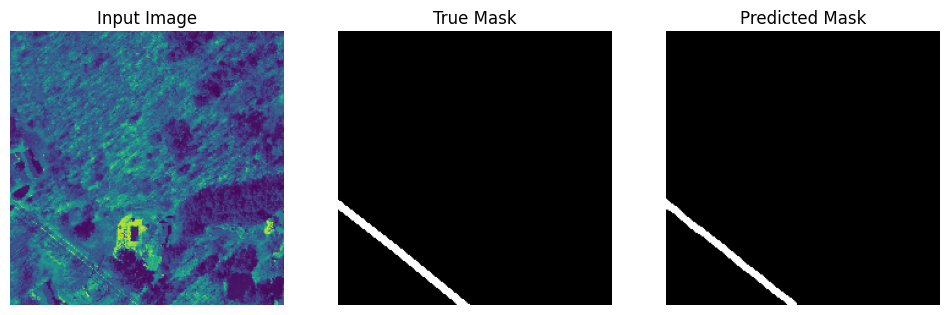

In [ ]:
import torch
import matplotlib.pyplot as plt

# # Load the best model
# checkpoint = torch.load("./checkpoints/best_model.pt", map_location=device)

# # Recreate the model and load weights
# model = UNet(out_channels=300).to(device)
# model.load_state_dict(checkpoint['model_state_dict'])
# model.eval()
# print(f"✅ Loaded best model from epoch {checkpoint['epoch']}")

# Pick a random sample from the test dataset
img, true_mask = next(iter(tst_dl))

# Preprocess image for model input
# input_tensor = tfms(img.copy() / 255.0).unsqueeze(0).to(device)  # shape [1, C, H, W]

# Run inference
with torch.no_grad():
    pred_mask = model(img)
    _, pred_mask = torch.max(pred_mask, dim=1)



    # pred_mask = pred_mask.permute(1,2,0).detach().cpu()[:,:,0]  # shape [H, W]

# Plot input image, true mask, and predicted mask
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(img[0].permute(1,2,0).detach().cpu()[:,:,0])
ax[0].set_title("Input Image")
ax[0].axis("off")

ax[1].imshow(true_mask.permute(1,2,0).detach().cpu()[:,:,0], cmap="gray")
ax[1].set_title("True Mask")
ax[1].axis("off")

ax[2].imshow(pred_mask.permute(1,2,0).detach().cpu()[:,:,0], cmap="gray")
ax[2].set_title("Predicted Mask")
ax[2].axis("off")

plt.show()


Having analysed a few images, the results seem promising. 